In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('earthquake_data_tsunami.csv')
print("Описание датасета.")
print("Предметная область: оценка риска цунами")
print("Источник данных: https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset/data")
print("Характер данных: реальные")
print("Атрибуты:")
print("magnitude - магнитуда землетрясения (по шкале Рихтера) (числовой реальный)")
print("cdi - индекс общественной десятичной интенсивности (ощущаемая сила) (числовой имитационный)")
print("mmi - модифицированная шкала Меркалли (инструментальная) (числовой имитационный)")
print("sig - суммарный показатель опасности, рассчитанный из других параметров (числовой имитационный)")
print("nst - количество реально существующих сейсмических станций, участвовавших в наблюдении (числовой реальный)")
print("dmin - расстояние до ближайшей станции, измеренное в градусах (числовой реальный)")
print("gap - азимутальный разрыв между станциями, рассчитанный по их расположению (числовой реальный)")
print("depth - фактическая глубина фокуса землетрясения (числовой реальный)")
print("latitude - географическая широта эпицентра (числовой реальный)")
print("longitude - географическая долгота эпицентра (числовой реальный)")
print("year - год события (числовой реальный)")
print("Month - месяц события (числовой реальный)")
print("Размер:", df.shape)
print("Числовые атрибуты:", list(df.select_dtypes(include=[np.number]).columns))

Описание датасета.
Предметная область: оценка риска цунами
Источник данных: https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset/data
Характер данных: реальные
Атрибуты:
magnitude - магнитуда землетрясения (по шкале Рихтера) (числовой реальный)
cdi - индекс общественной десятичной интенсивности (ощущаемая сила) (числовой имитационный)
mmi - модифицированная шкала Меркалли (инструментальная) (числовой имитационный)
sig - суммарный показатель опасности, рассчитанный из других параметров (числовой имитационный)
nst - количество реально существующих сейсмических станций, участвовавших в наблюдении (числовой реальный)
dmin - расстояние до ближайшей станции, измеренное в градусах (числовой реальный)
gap - азимутальный разрыв между станциями, рассчитанный по их расположению (числовой реальный)
depth - фактическая глубина фокуса землетрясения (числовой реальный)
latitude - географическая широта эпицентра (числовой реальный)
longitude - географическая дол

Атрибут: magnitude
Среднее значение: 6.941
СКО: 0.446
Пропущенные значения: 0
Количество выбросов (по IQR): 37
Количество выбросов (по СКО ±3σ): 10

Атрибут: cdi
Среднее значение: 4.334
СКО: 3.170
Пропущенные значения: 0
Количество выбросов (по IQR): 0
Количество выбросов (по СКО ±3σ): 0

Атрибут: mmi
Среднее значение: 5.964
СКО: 1.463
Пропущенные значения: 0
Количество выбросов (по IQR): 1
Количество выбросов (по СКО ±3σ): 1

Атрибут: sig
Среднее значение: 870.109
СКО: 322.465
Пропущенные значения: 0
Количество выбросов (по IQR): 73
Количество выбросов (по СКО ±3σ): 19

Атрибут: nst
Среднее значение: 230.251
СКО: 250.188
Пропущенные значения: 0
Количество выбросов (по IQR): 0
Количество выбросов (по СКО ±3σ): 0

Атрибут: dmin
Среднее значение: 1.326
СКО: 2.219
Пропущенные значения: 0
Количество выбросов (по IQR): 61
Количество выбросов (по СКО ±3σ): 17

Атрибут: gap
Среднее значение: 25.039
СКО: 24.225
Пропущенные значения: 0
Количество выбросов (по IQR): 48
Количество выбросов (по СК

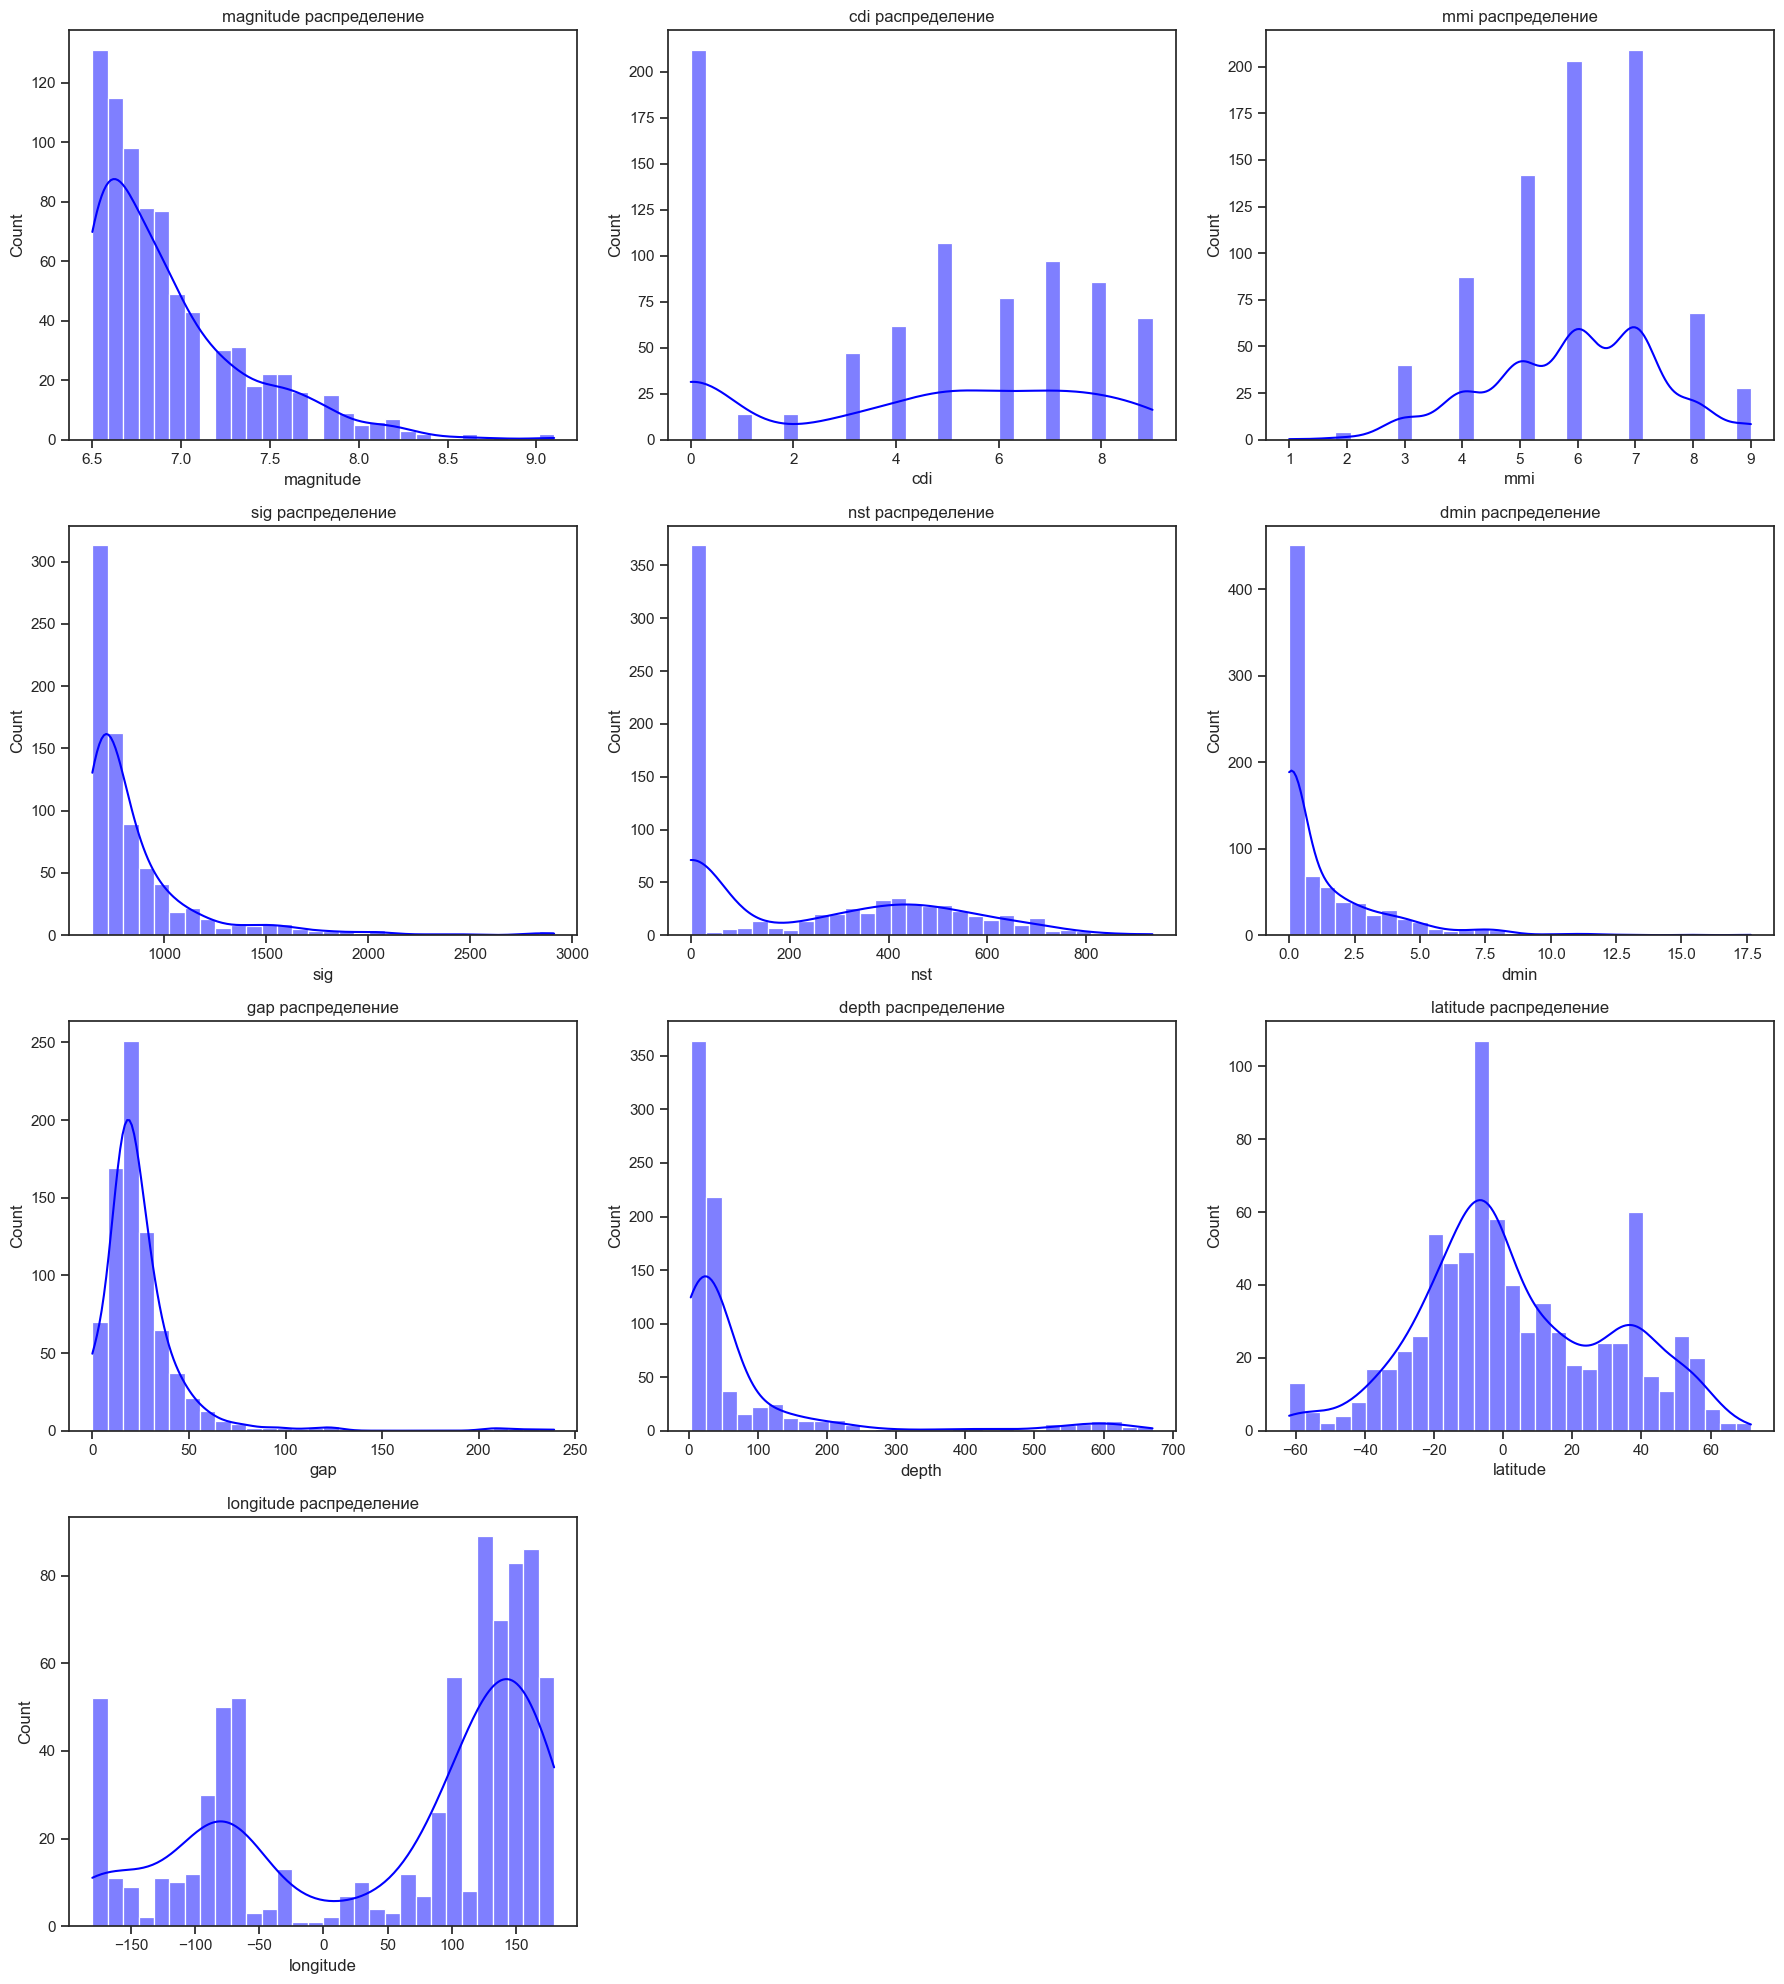

Пропусков нет




In [59]:
# Определяем числовые колонки
exclude_cols = ['Year', 'Month', 'tsunami']
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]
# Создаем фигуру для графиков
import math
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(18, 5*rows))

# Проходим по всем числовым колонкам
for i, col in enumerate(numeric_cols, 1):
    print(f"Атрибут: {col}")
    
    # Среднее и стандартное отклонение
    mean_val = df[col].mean()
    std_val = df[col].std()
    print(f"Среднее значение: {mean_val:.3f}")
    print(f"СКО: {std_val:.3f}")
    
    # Пропущенные значения
    missing = df[col].isna().sum()
    print(f"Пропущенные значения: {missing}")
    if missing > 0:
        print("Возможная обработка пропущенных значений: заполнить средним, медианой или удалить строки с пропусками.")
        
    # Гистограмма и выбросы 
    plt.subplot(rows, cols, i) 
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"{col} распределение")
    
    # Определение выбросов через IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Количество выбросов (по IQR): {len(outliers)}")
    lower_bound_sigma = mean_val - 3*std_val
    upper_bound_sigma = mean_val + 3*std_val
    outliers_sigma = df[(df[col] < lower_bound_sigma) | (df[col] > upper_bound_sigma)]
    print(f"Количество выбросов (по СКО ±3σ): {len(outliers_sigma)}\n")


plt.tight_layout()
plt.show()
print("Пропусков нет\n\n")

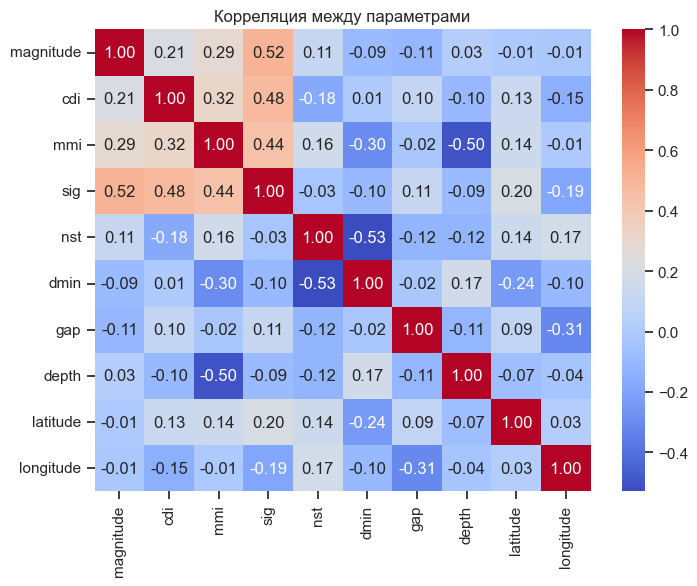

Высококоррелированных атрибутов не обнаружено


Низкокоррелированные атрибуты:
magnitude и nst: 0.11
magnitude и dmin: -0.09
magnitude и gap: -0.11
magnitude и depth: 0.03
magnitude и latitude: -0.01
magnitude и longitude: -0.01
cdi и nst: -0.18
cdi и dmin: 0.01
cdi и gap: 0.10
cdi и depth: -0.10
cdi и latitude: 0.13
cdi и longitude: -0.15
mmi и nst: 0.16
mmi и gap: -0.02
mmi и latitude: 0.14
mmi и longitude: -0.01
sig и nst: -0.03
sig и dmin: -0.10
sig и gap: 0.11
sig и depth: -0.09
sig и longitude: -0.19
nst и gap: -0.12
nst и depth: -0.12
nst и latitude: 0.14
nst и longitude: 0.17
dmin и gap: -0.02
dmin и depth: 0.17
dmin и longitude: -0.10
gap и depth: -0.11
gap и latitude: 0.09
depth и latitude: -0.07
depth и longitude: -0.04
latitude и longitude: 0.03


In [60]:
# Определяем числовые колонки без Year, Month и tsunami
exclude_cols = ['Year', 'Month', 'tsunami']
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Корреляционная матрица
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между параметрами')
plt.show()

high_corr_thresh = 0.7
high_corr_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) >= high_corr_thresh:
            high_corr_pairs.append((col1, col2, corr_value))
if len(high_corr_pairs)>0: 
    print("Высококоррелированные атрибуты (коэффициент > 0.7 или < -0.7):")
    for col1, col2, corr_value in high_corr_pairs:
        corr_type = "положительная" if corr_value > 0 else "отрицательная"
        print(f"{col1} и {col2}: {corr_value:.2f} ({corr_type} корреляция)")
else: print("Высококоррелированных атрибутов не обнаружено\n")
    
no_corr_thresh = 0.2
no_corr_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) < no_corr_thresh:
            no_corr_pairs.append((col1, col2, corr_value))
if len(no_corr_pairs)>0:
    print("\nНизкокоррелированные атрибуты:")
    for col1, col2, corr_value in no_corr_pairs:
        print(f"{col1} и {col2}: {corr_value:.2f}")
else: print("Низкокоррелированных атрибутов не обнаружено\n")

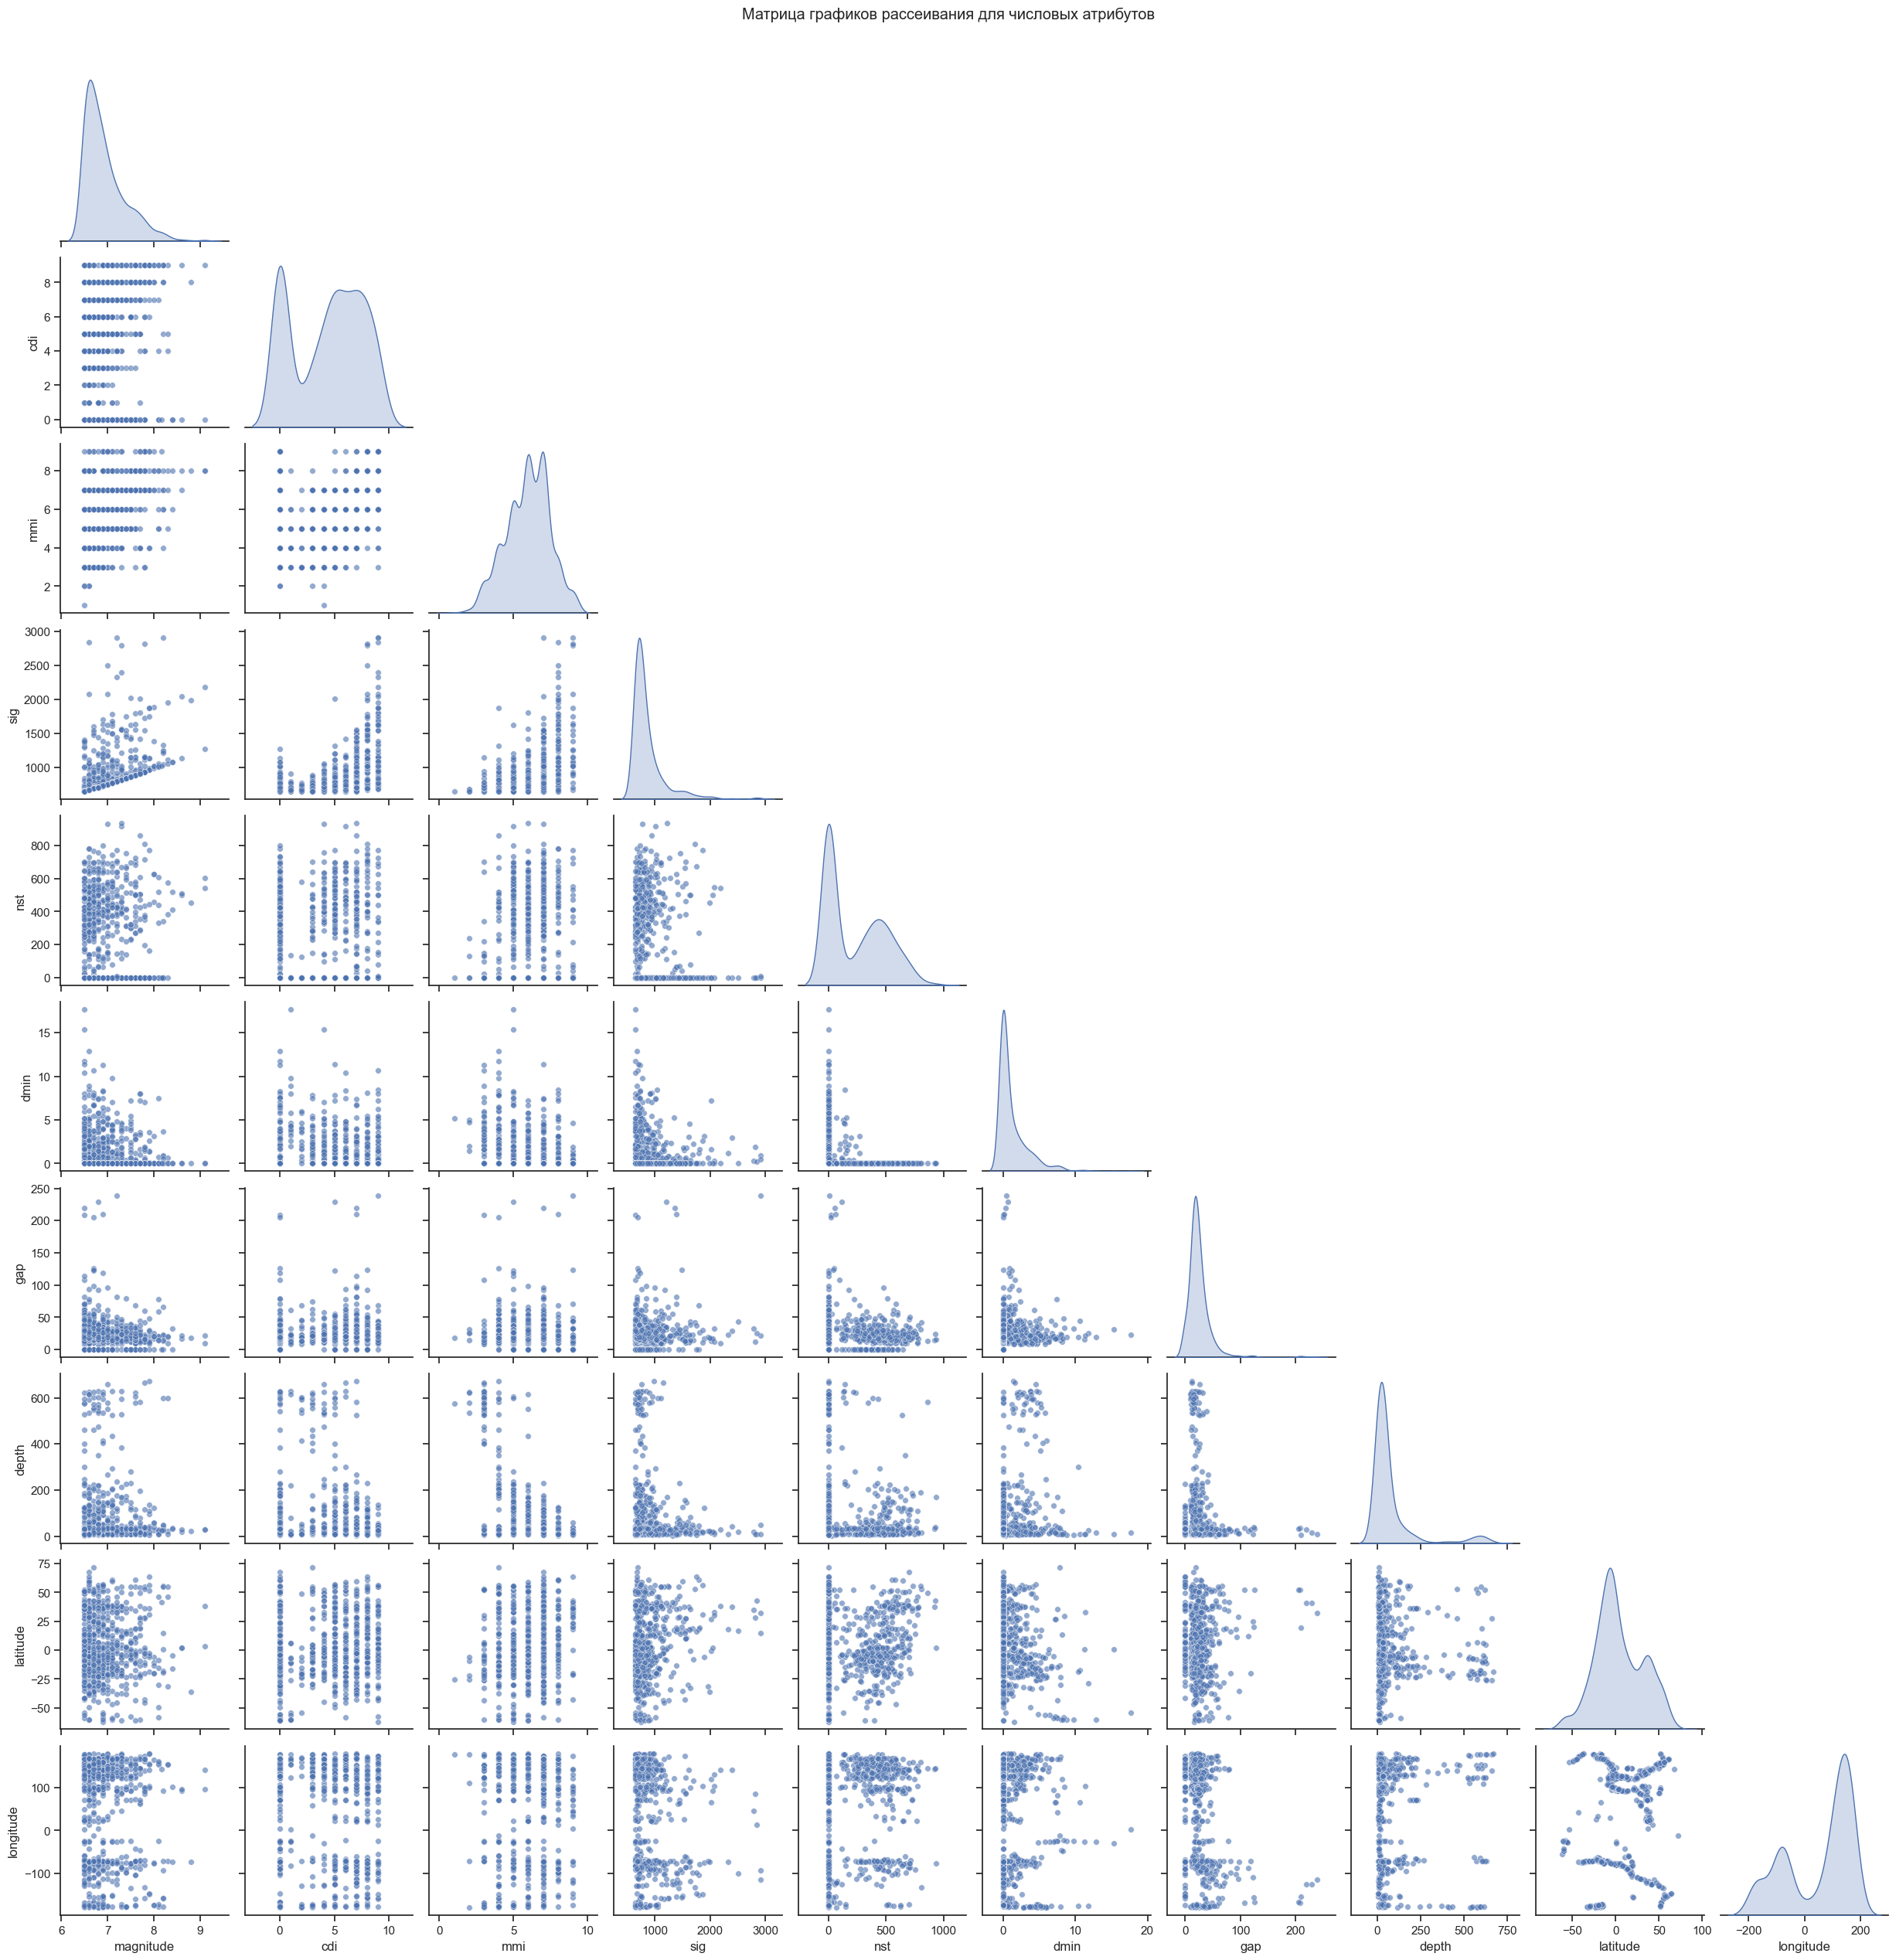

In [61]:
# Матрица графиков рассеивания
sns.set(style="ticks")
sns.pairplot(df[numeric_cols], corner=True, diag_kind='kde', plot_kws={'alpha':0.6, 's':30})
plt.suptitle("Матрица графиков рассеивания для числовых атрибутов", y=1.02)
plt.show()

In [62]:
print("Слабые корреляции означают независимость параметров")
print("Графики рассеивания визуализируют взаимосвязи между всеми параметрами")
print("\nВыводы:")
print("1. Корреляционный анализ показал наличие слабых связей между параметрами.")
print("2. Наиболее выраженная положительная корреляция наблюдается между показателями, отражающими интенсивность")
print("землетрясения, например, magnitude и sig, что соответствует физической природе процесса.")
print("3. Большинство остальных параметров демонстрируют слабую или отсутствующую корреляцию, что указывает")
print("на их относительную независимость и необходимость учитывать их отдельно при анализе риска цунами.")

Слабые корреляции означают независимость параметров
Графики рассеивания визуализируют взаимосвязи между всеми параметрами

Выводы:
1. Корреляционный анализ показал наличие слабых связей между параметрами.
2. Наиболее выраженная положительная корреляция наблюдается между показателями, отражающими интенсивность
землетрясения, например, magnitude и sig, что соответствует физической природе процесса.
3. Большинство остальных параметров демонстрируют слабую или отсутствующую корреляцию, что указывает
на их относительную независимость и необходимость учитывать их отдельно при анализе риска цунами.
